In [ ]:
import fastf1 as ff1
import pandas as pd
from fastf1.core import Laps
from fastf1 import plotting
from fastf1 import utils
from matplotlib import pyplot as plt
from timple.timedelta import strftimedelta
import numpy as np
from matplotlib.pyplot import figure
from matplotlib.collections import LineCollection
from matplotlib import cm

#carico i dati del 2023
ff1.Cache.enable_cache('2023Monaco') 
fp = ff1.get_session(2023, 'Monaco', 'Q')
fp.load()

In [3]:
driver1 = "VER"
driver2 = "ALO"
laps_drv1 = fp.laps.pick_driver(driver1)
laps_drv2 = fp.laps.pick_driver(driver2)

fastest_drv1 = laps_drv1.pick_fastest().get_telemetry().add_distance()
fastest_drv2 = laps_drv2.pick_fastest().get_telemetry().add_distance()

In [6]:
fastest_drv1["Distance"].iloc[-1], fastest_drv2["Distance"].iloc[-1]

(3276.215277777778, 3283.0722222222234)

In [13]:
driver_dict = dict()
for driver in pd.unique(fp.laps['Driver']):
    driver_dict[driver]=fp.laps.pick_driver(driver).pick_fastest().get_telemetry().add_distance()['Distance'].iloc[-1]



In [ ]:
ordered_dict=dict(sorted(driver_dict.items(), key=lambda item: item[1]))


Text(0, 0.5, 'Driver')

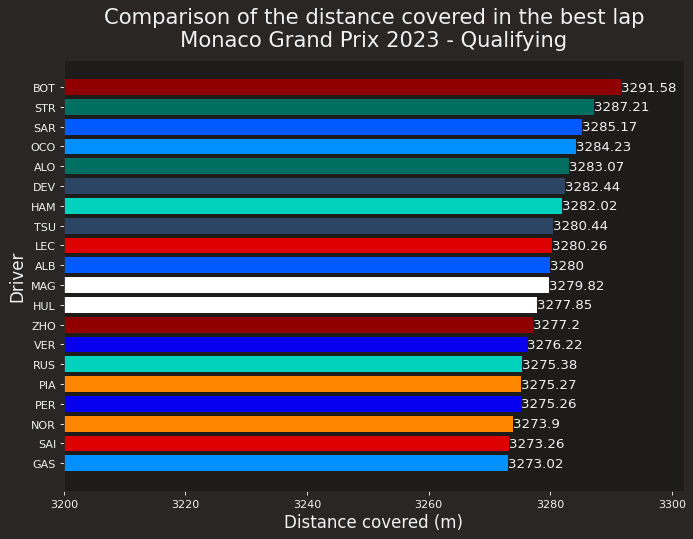

In [37]:
team_color_drvrs = ordered_dict.keys()
team_colors = [ff1.plotting.team_color('Alpine'),ff1.plotting.team_color('Ferrari'), 
               ff1.plotting.team_color('McLaren'), ff1.plotting.team_color('RedBull'),
               ff1.plotting.team_color('McLaren'), ff1.plotting.team_color('Mercedes'),
               ff1.plotting.team_color('RedBull'), ff1.plotting.team_color('Alfa Romeo'),
               ff1.plotting.team_color('Haas'), ff1.plotting.team_color('Haas'),
               ff1.plotting.team_color('Williams'), ff1.plotting.team_color('Ferrari'),
               ff1.plotting.team_color('Alpha Tauri'), ff1.plotting.team_color('Mercedes'),
               ff1.plotting.team_color('Alpha Tauri'), ff1.plotting.team_color('Aston Martin'),
               ff1.plotting.team_color('Alpine'), ff1.plotting.team_color('Williams'),
               ff1.plotting.team_color('Aston MArtin'), ff1.plotting.team_color('Alfa Romeo'),]

ff1.plotting.setup_mpl()
figure(figsize=(10, 7), dpi=80)
plt.bar_label(plt.barh(list(ordered_dict.keys()), list(ordered_dict.values()), color = team_colors), fontsize=12)
ax = plt.gca()
ax.set_xlim([3200, 3302])
plt.title(f"Comparison of the distance covered in the best lap\n"
          f"{fp.event['EventName']} {fp.event.year} - {fp.name}")
plt.xlabel('Distance covered (m)', fontsize=15)
plt.ylabel('Driver', fontsize=15)